In [11]:
# ----------------------------
# Import required libraries
# ----------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

# Set style using Seaborn's own configuration
sns.set(style="whitegrid")

# Show plots inline (for Jupyter)
%matplotlib inline

# ----------------------------
# Load the data
# ----------------------------
try:
    df = pd.read_csv('../data/analyzed_reviews.csv')
    print(f"✅ Total reviews loaded: {len(df)}")
    print(df.head())
except FileNotFoundError:
    print("❌ File not found: 'data/analyzed_reviews.csv'. Check the path.")


✅ Total reviews loaded: 1997
   review_id                                        review_text  \
0          1       the app is proactive and a good connections.   
1          2    I cannot send to cbebirr app. through this app.   
2          3                                               good   
3          4                                     not functional   
4          5  everytime you uninstall the app you have to re...   

  sentiment_label  sentiment_score identified_themes  \
0        positive         0.999868         ['Other']   
1        negative        -0.995335         ['Other']   
2        positive         0.999816         ['Other']   
3        negative        -0.999779         ['Other']   
4        negative        -0.990516         ['Other']   

                          bank        date  
0  Commercial Bank of Ethiopia  2025-06-05  
1  Commercial Bank of Ethiopia  2025-06-05  
2  Commercial Bank of Ethiopia  2025-06-05  
3  Commercial Bank of Ethiopia  2025-06-04  
4  Com

In [14]:
# Print insights and recommendations as output (not comments)
insights = """
---------------------------------------------
💡 Insights per Bank based on Sentiment & Themes
---------------------------------------------

📌 Commercial Bank of Ethiopia (CBE)
- ✅ Driver: Positive feedback on 'User Interface & Experience' (e.g., 'easy', 'great')
  → 36 reviews with 5-star sentiment of 0.686647
- ❌ Pain Point: 'Transaction Performance' issues (e.g., 'slow', 'delay')
  → 42 reviews

📌 Bank of Abyssinia (BOA)
- ✅ Driver: Some positive feedback on 'Feature Requests' (e.g., 'update')
  → 58 reviews with 5-star sentiment of 0.544282
- ❌ Pain Point: 'Transaction Performance' problems (e.g., 'crash', 'slow')
  → 51 reviews

📌 Dashen Bank
- ✅ Driver: Positive sentiment in 'Transaction Performance' (e.g., 'fast')
  → 81 reviews with 5-star sentiment of 0.784530
- ❌ Pain Point: 'Account Access Issues' (e.g., 'login', 'error')
  → 33 reviews

---------------------------------------------
📊 Bank Comparison
---------------------------------------------
- Sentiment: Dashen Bank leads with highest 5-star sentiment (0.784530)
- BOA has the lowest 1-star sentiment (-0.787765), matching its average rating (2.8)
- Themes:
  → BOA has the most 'Transaction Performance' issues (51)
  → CBE strong in 'User Interface & Experience'
  → Dashen strong in 'Transaction Performance'

---------------------------------------------
✅ Recommendations
---------------------------------------------
1. 🚀 Implement a budgeting tool to improve UX, leveraging positive feedback from CBE & Dashen users.
2. 🔧 Optimize transaction processing and fix app crashes, especially for BOA where it’s a major pain point.
"""

print(insights)



---------------------------------------------
💡 Insights per Bank based on Sentiment & Themes
---------------------------------------------

📌 Commercial Bank of Ethiopia (CBE)
- ✅ Driver: Positive feedback on 'User Interface & Experience' (e.g., 'easy', 'great')
  → 36 reviews with 5-star sentiment of 0.686647
- ❌ Pain Point: 'Transaction Performance' issues (e.g., 'slow', 'delay')
  → 42 reviews

📌 Bank of Abyssinia (BOA)
- ✅ Driver: Some positive feedback on 'Feature Requests' (e.g., 'update')
  → 58 reviews with 5-star sentiment of 0.544282
- ❌ Pain Point: 'Transaction Performance' problems (e.g., 'crash', 'slow')
  → 51 reviews

📌 Dashen Bank
- ✅ Driver: Positive sentiment in 'Transaction Performance' (e.g., 'fast')
  → 81 reviews with 5-star sentiment of 0.784530
- ❌ Pain Point: 'Account Access Issues' (e.g., 'login', 'error')
  → 33 reviews

---------------------------------------------
📊 Bank Comparison
---------------------------------------------
- Sentiment: Dashen Bank lea

C:\Users\dagi\AppData\Local\Temp\ipykernel_12744\3459725274.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='sentiment_label', y='sentiment_score', hue='bank', ci=None)


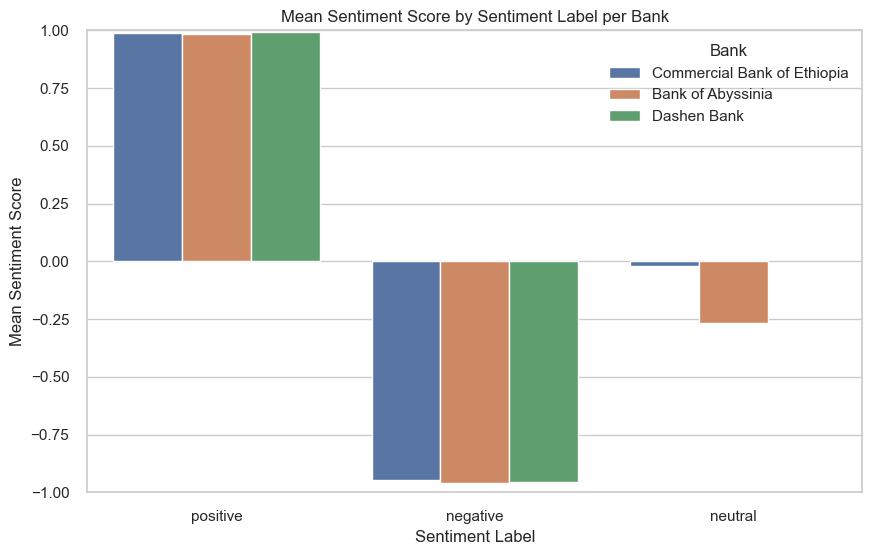

In [ ]:

# Visualization 1: Sentiment Trend by Rating per Bank
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='sentiment_label', y='sentiment_score', hue='bank', ci=None)
plt.title('Mean Sentiment Score by Sentiment Label per Bank')
plt.xlabel('Sentiment Label')
plt.ylabel('Mean Sentiment Score')
plt.legend(title='Bank')
plt.ylim(-1, 1)
plt.show()


Index(['review', 'rating', 'date', 'bank', 'source'], dtype='object')


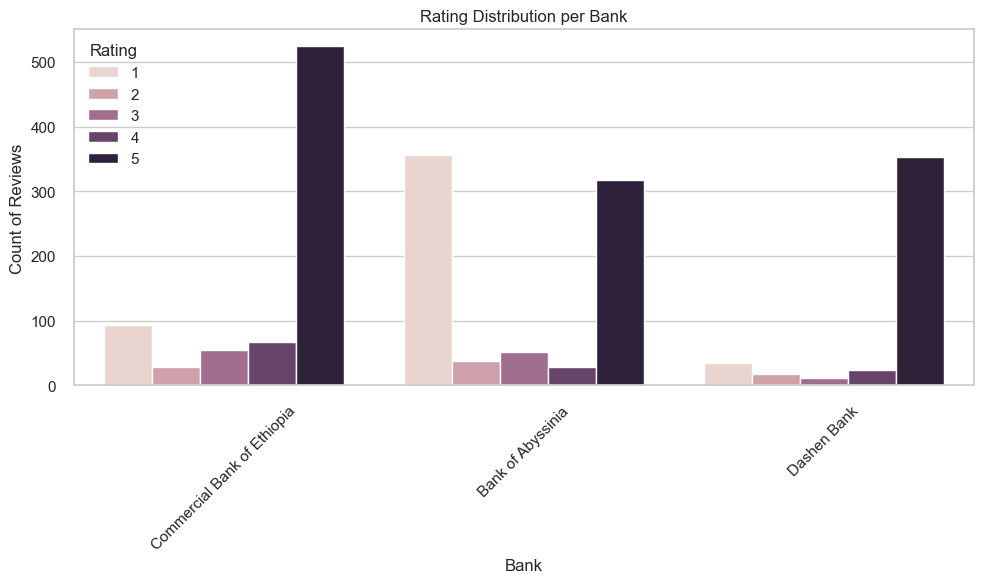

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the original CSV that contains the 'rating' column
df_raw = pd.read_csv('../data/bank_reviews.csv')

# Clean up column names (important in case of hidden characters or whitespace)
df_raw.columns = df_raw.columns.str.strip()

# Ensure 'bank' and 'rating' columns exist
print(df_raw.columns)

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_raw, x='bank', hue='rating')
plt.title('Rating Distribution per Bank')
plt.xlabel('Bank')
plt.ylabel('Count of Reviews')
plt.legend(title='Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


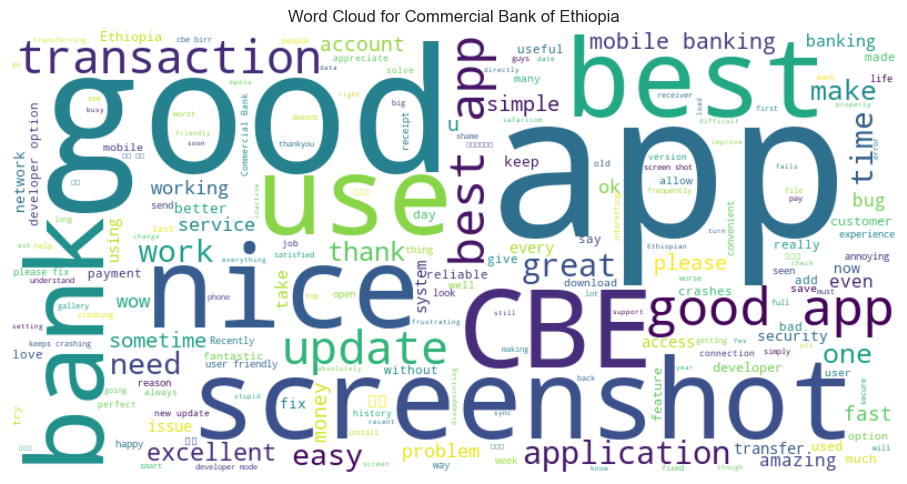

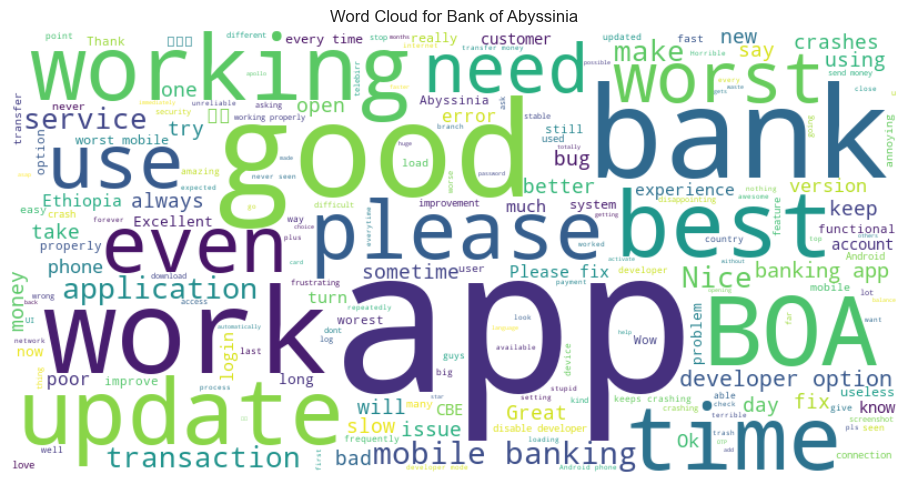

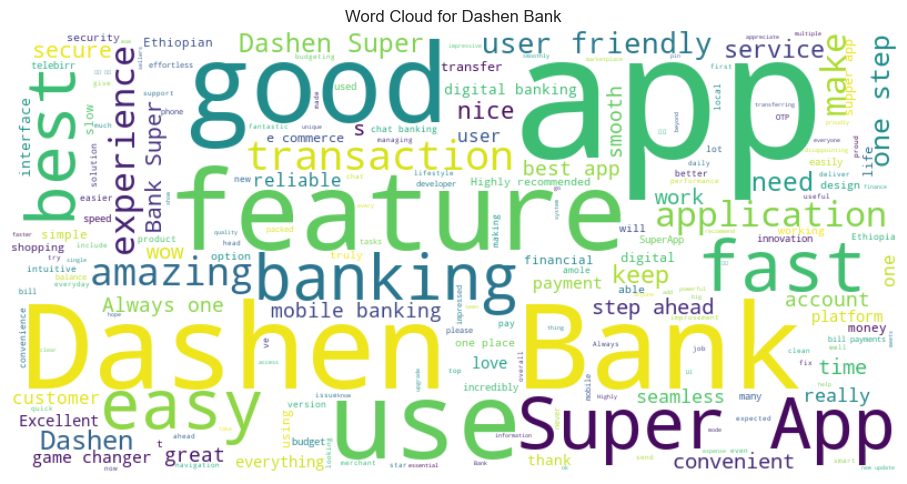

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Loop through unique banks in the DataFrame
banks = df['bank'].unique()

for bank in banks:
    bank_text = ' '.join(df[df['bank'] == bank]['review_text'].dropna().values)
    generate_wordcloud(bank_text, f'Word Cloud for {bank}')


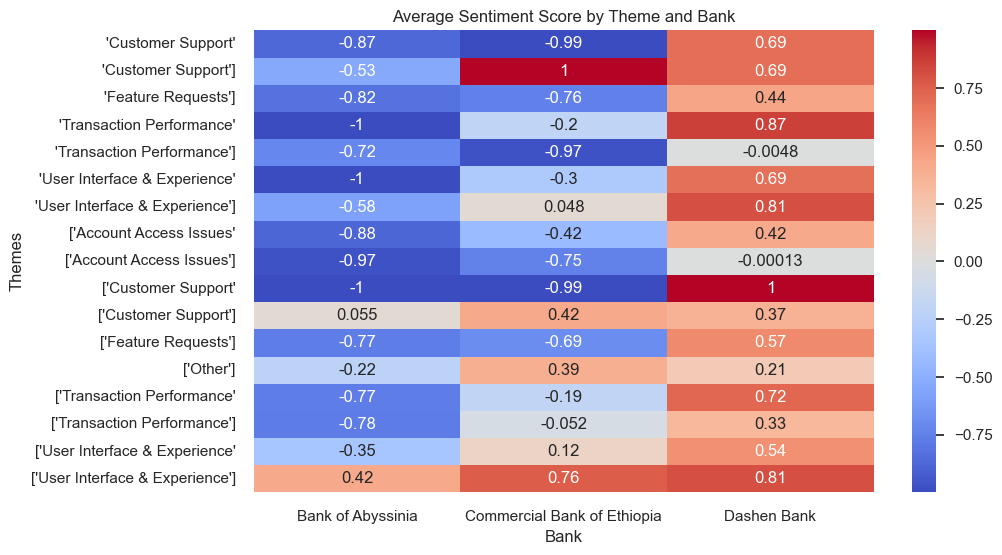

In [29]:
#Visualization 4: Theme Sentiment Heatmap
theme_df = df.assign(identified_themes=df['identified_themes'].str.split(', ')).explode('identified_themes')
pivot_table = theme_df.pivot_table(values='sentiment_score', index='identified_themes', columns='bank', aggfunc='mean', fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', center=0)
plt.title('Average Sentiment Score by Theme and Bank')
plt.xlabel('Bank')
plt.ylabel('Themes')
plt.show()

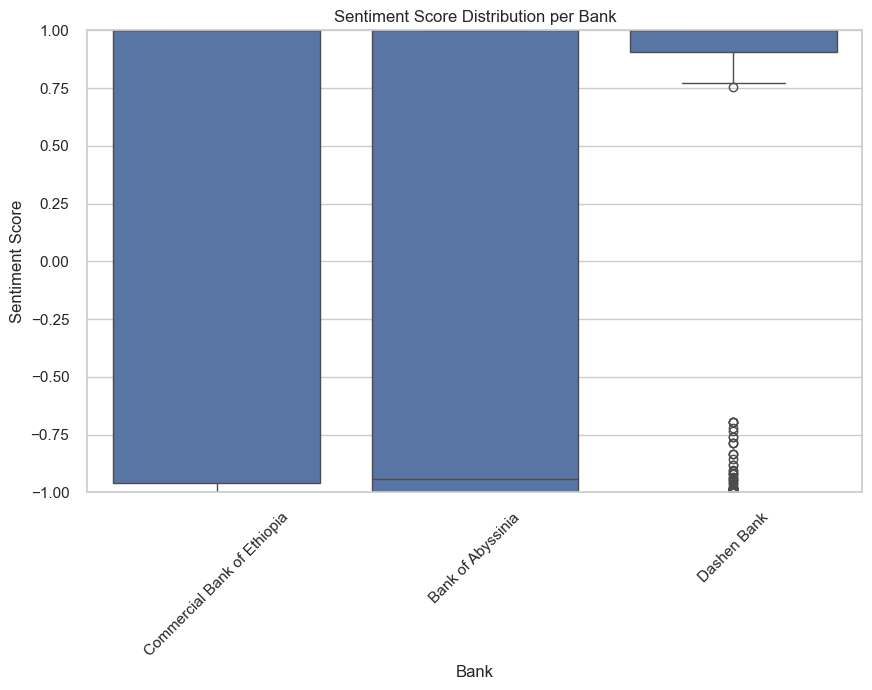

In [30]:
#Visualization 5: Sentiment Distribution Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='bank', y='sentiment_score')
plt.title('Sentiment Score Distribution per Bank')
plt.xlabel('Bank')
plt.ylabel('Sentiment Score')
plt.ylim(-1, 1)
plt.xticks(rotation=45)
plt.show()